In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('../../data/MS MARCO/results/llama3-8b-8192_128Q_Run_BaseLLMNORAG.csv')
df2 = pd.read_csv('../../data/MS MARCO/results/llama3-8b-8192_128Q_Run2.csv')

In [5]:
df = pd.DataFrame(columns=['rag_truth','base_truth'])

In [13]:
df['rag_truth'] = df2['truth'].apply(lambda x: bool(x))
df['base_truth'] = df1['truth'].apply(lambda x: bool(x))

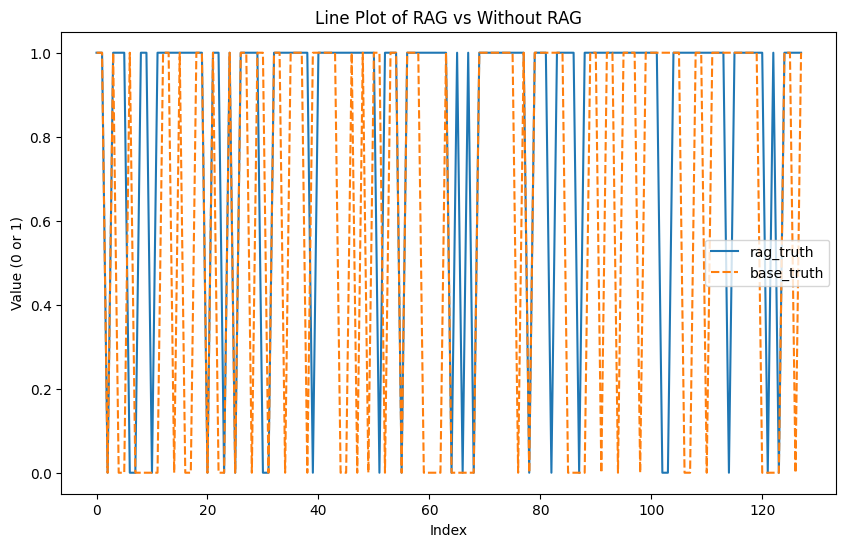

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df)
plt.title('Line Plot of RAG vs Without RAG')
plt.xlabel('Index')
plt.ylabel('Value (0 or 1)')
plt.show()

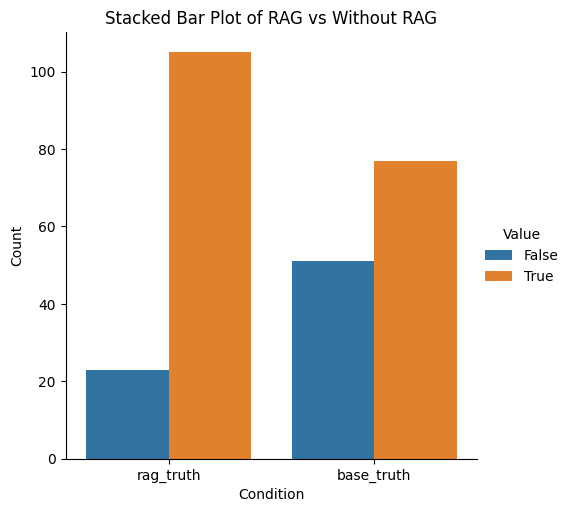

In [15]:
df_melted = pd.melt(df, var_name='Condition', value_name='Value')
sns.catplot(x='Condition', hue='Value', kind='count', data=df_melted)
plt.title('Stacked Bar Plot of RAG vs Without RAG')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

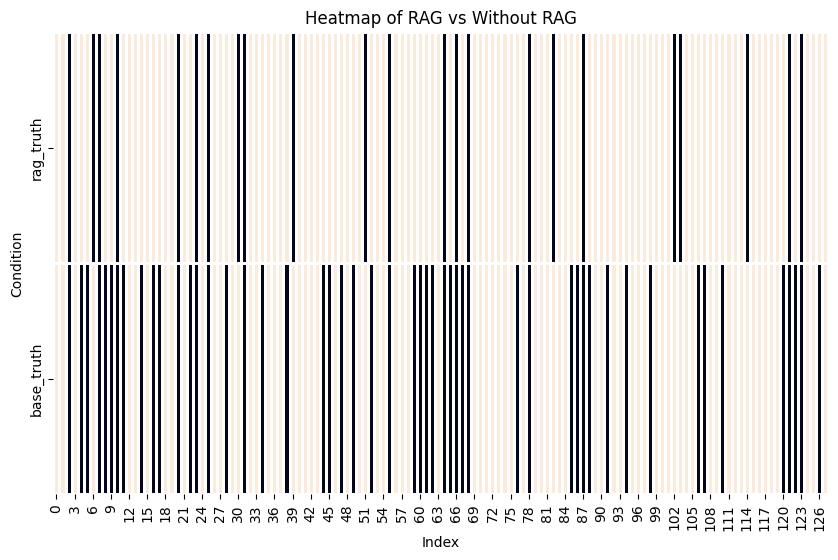

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.T, cbar=False, linewidths=1)
plt.title('Heatmap of RAG vs Without RAG')
plt.xlabel('Index')
plt.ylabel('Condition')
plt.show()


In [34]:
accuracy_with_rag = df['rag_truth'].mean()
accuracy_without_rag = df['base_truth'].mean()

print(f"Accuracy with RAG: {accuracy_with_rag:.2f}")
print(f"Accuracy without RAG: {accuracy_without_rag:.2f}")

Accuracy with RAG: 0.82
Accuracy without RAG: 0.60


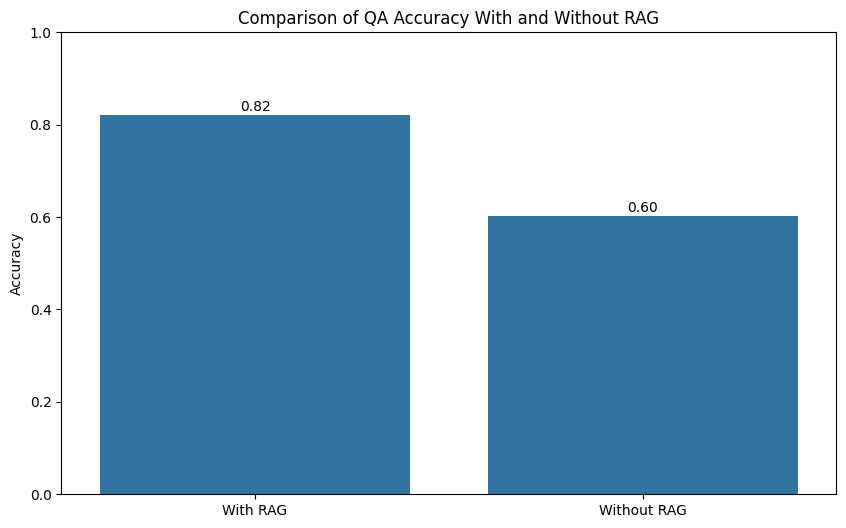

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['With RAG', 'Without RAG'], y=[accuracy_with_rag, accuracy_without_rag])
plt.title('Comparison of QA Accuracy With and Without RAG')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate([accuracy_with_rag, accuracy_without_rag]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

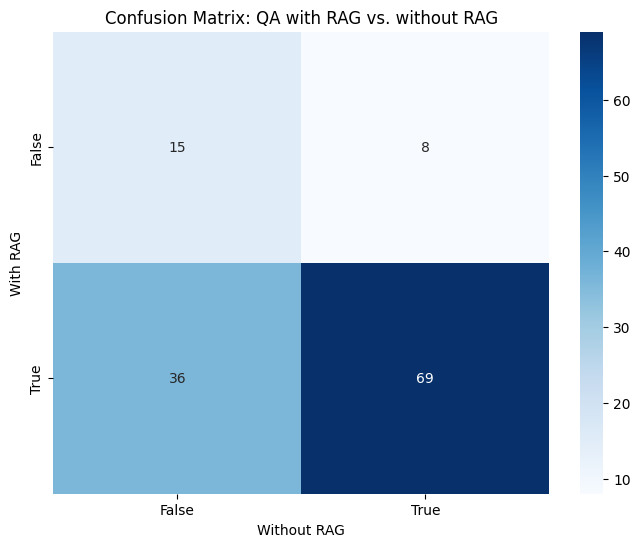

In [36]:
confusion_matrix = pd.crosstab(df['rag_truth'], df['base_truth'], 
                               rownames=['With RAG'], colnames=['Without RAG'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: QA with RAG vs. without RAG')
plt.show()

- Agreement: In total, 84 instances (15 + 69) where both methods agreed (either both correct or both incorrect)
- Disagreement: 44 instances (8 + 36) where the methods disagreed
- RAG improvement: In 36 cases, RAG corrected errors made by the non-RAG method
- RAG regression: In 8 cases, RAG made mistakes where the non-RAG method was correct


In [44]:
(0.82-0.6 )/ 0.6 * 100

36.666666666666664